In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches


In [2]:
df_sdp_60_1 = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\data_1\\data_sdp_60_1.csv')
df_dd_60 = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\data_1\\data_dd_60.csv')

In [3]:
df_sdp_60_1.Module = df_sdp_60_1.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]
df_dd_60.Module = df_dd_60.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [4]:
df_sdp_60_1.nbDataPacketsForwarded.mean()

623.2544444444444

In [5]:
df_dd_60.nbDataPacketsForwarded.mean()

1936.76

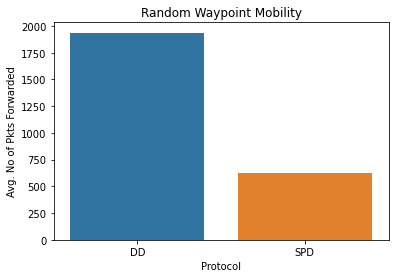

In [6]:
x = ['DD', 'SPD']
y = [df_dd_60.nbDataPacketsForwarded.mean(),  df_sdp_60_1.nbDataPacketsForwarded.mean()]

sns.barplot(x, y)
plt.xlabel("Protocol")
plt.ylabel("Avg. No of Pkts Forwarded")
plt.title("Random Waypoint Mobility") # You can comment this line out if you don't need title

plt.show()

In [515]:
# df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\data_3\\data_spd_n_60_w_0.csv')
df = pd.read_csv('C:\\Users\\KAVINDA\\Documents\\Sem 6B\\FYP\\OMNET++\\adhoc-sim\\results\\data_1\\data_aodv_n_60_w_900.csv')

In [516]:
# df.head()

In [517]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [518]:
df = df.sort_values(by=['repetition'])

In [519]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1
        
print (results)   


[0.9855, 0.9741, 0.9843, 0.9826, 0.9905, 0.9978, 0.9842, 0.9516, 0.9831, 0.9718, 0.9611, 0.9659, 0.9712, 0.9791, 0.9837, 0.978, 0.986, 0.9826, 0.9798, 0.9683, 0.9944, 0.1501, 0.991, 0.9313, 0.995, 0.9922, 0.9955, 0.0829, 0.9549, 0.2734]


In [520]:
print (results_x) 

[0.9878, 0.9722, 0.9822, 0.98, 0.9856, 0.9956, 0.9722, 0.95, 0.9778, 0.9711, 0.9433, 0.9544, 0.97, 0.9667, 0.9767, 0.9656, 0.98, 0.9744, 0.9789, 0.9633, 0.9911, 0.0811, 0.9856, 0.9233, 0.9933, 0.9878, 0.9944, 0.0456, 0.9222, 0.1622]


In [521]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 89.74


In [522]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 88.45


In [523]:
# df_17

In [524]:
# df_22

In [550]:
df_spd = pd.DataFrame({'PauseTime':[0, 50, 100, 300, 600, 900],
                       'PDF':[74.71, 72.25, 72.94, 76.31, 74.92,78.56]})

df_spd_x = pd.DataFrame({'PauseTime':[0, 50, 100, 300, 600, 900],
                       'PDF':[84.16, 82.97, 81.68, 81.86, 83.03, 86.51]})


df_aodv = pd.DataFrame({'PauseTime':[0, 50, 100, 300, 600, 900],
                       'PDF':[83.27, 86.24, 85.42, 89.09, 89.58, 89.74]})

df_aodv_x = pd.DataFrame({'PauseTime':[0, 50, 100, 300, 600, 900],
                       'PDF':[77.24, 81.13, 79.55, 84.9, 85.81, 88.45]})


df_spd_b = pd.DataFrame({'PauseTime':[0, 50, 100, 300, 600, 900],
                       'PDF':[74.71, 72.25, 72.94, 76.31, 74.92,78.56]})

df_spd_b_x = pd.DataFrame({'PauseTime':[0, 50, 100, 300, 600, 900],
                       'PDF':[84.16, 82.97, 81.68, 81.86, 83.03, 86.51]})

In [551]:
# sns.lineplot(data=df_spd, x="PauseTime", y="PDF" , markers=True)

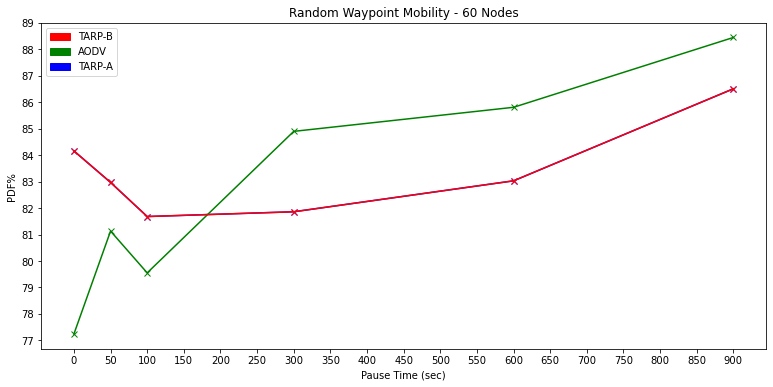

In [552]:
plt.xlabel("Pause Time (sec)")
plt.ylabel("PDF%")
plt.title("Random Waypoint Mobility - 60 Nodes")

plt.xticks(np.arange(0,901, 50))
plt.yticks(np.arange(0,102, 1))
# plt.grid()

# plt.plot(df_spd.PauseTime, df_spd.PDF,  'b-o') 
plt.plot(df_spd_x.PauseTime, df_spd_x.PDF,  'b-x') 

# plt.plot(df_aodv.PauseTime, df_aodv.PDF,  'g-o') 
plt.plot(df_aodv_x.PauseTime, df_aodv_x.PDF,  'g-x') 

# plt.plot(df_spd_b.PauseTime, df_spd_b.PDF,  'r-o') 
plt.plot(df_spd_b_x.PauseTime, df_spd_b_x.PDF,  'r-x') 

red_patch = mpatches.Patch(color='red', label='TARP-B')
green_patch = mpatches.Patch(color='green', label='AODV')
blue_patch = mpatches.Patch(color='blue', label='TARP-A')

plt.legend(handles=[ red_patch, green_patch, blue_patch,])

fig = plt.gcf()
fig.set_size_inches(13, 6)